# Chapter 1: Exploratory Data Analysis

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### 1.1: Importing Data and First Look

In [27]:
# Reading the CSV file 'creditcard.csv' into a DataFrame named 'credit_df'
credit_df_raw = pd.read_csv('creditcard.csv')
# Displaying the content of the DataFrame
credit_df_raw

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [28]:
# Displaying information about the DataFrame 'credit_df', such as column names, data types, and others.
credit_df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [29]:
# Generating descriptive statistics for the 'Amount' column of the DataFrame 'credit_df'
credit_df_raw['Amount'].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

### 1.2: Checking Values

In [30]:
# checking the number of missing values in each column
credit_df_raw.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [31]:
# Counting the occurrences of each unique value in the 'Class' column of the DataFrame 'credit_df'
credit_df_raw['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

### 1.3: Visual Analysis

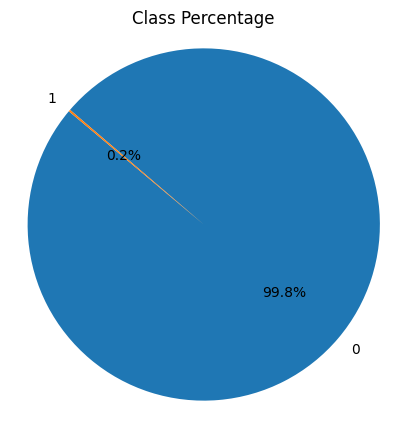

In [32]:
# Calculate the percentage of each class
class_percentages = (credit_df_raw['Class'].value_counts() / len(credit_df_raw)) * 100

# Create the pie chart
plt.figure(figsize=(5, 5))  # Define the figure size
plt.pie(class_percentages, labels=class_percentages.index, autopct='%1.1f%%', startangle=140)
plt.title('Class Percentage')  # Set the title
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# # Save the plot as an image file (e.g., PNG)
# plt.savefig('class_percentage.png', bbox_inches='tight')

plt.show()

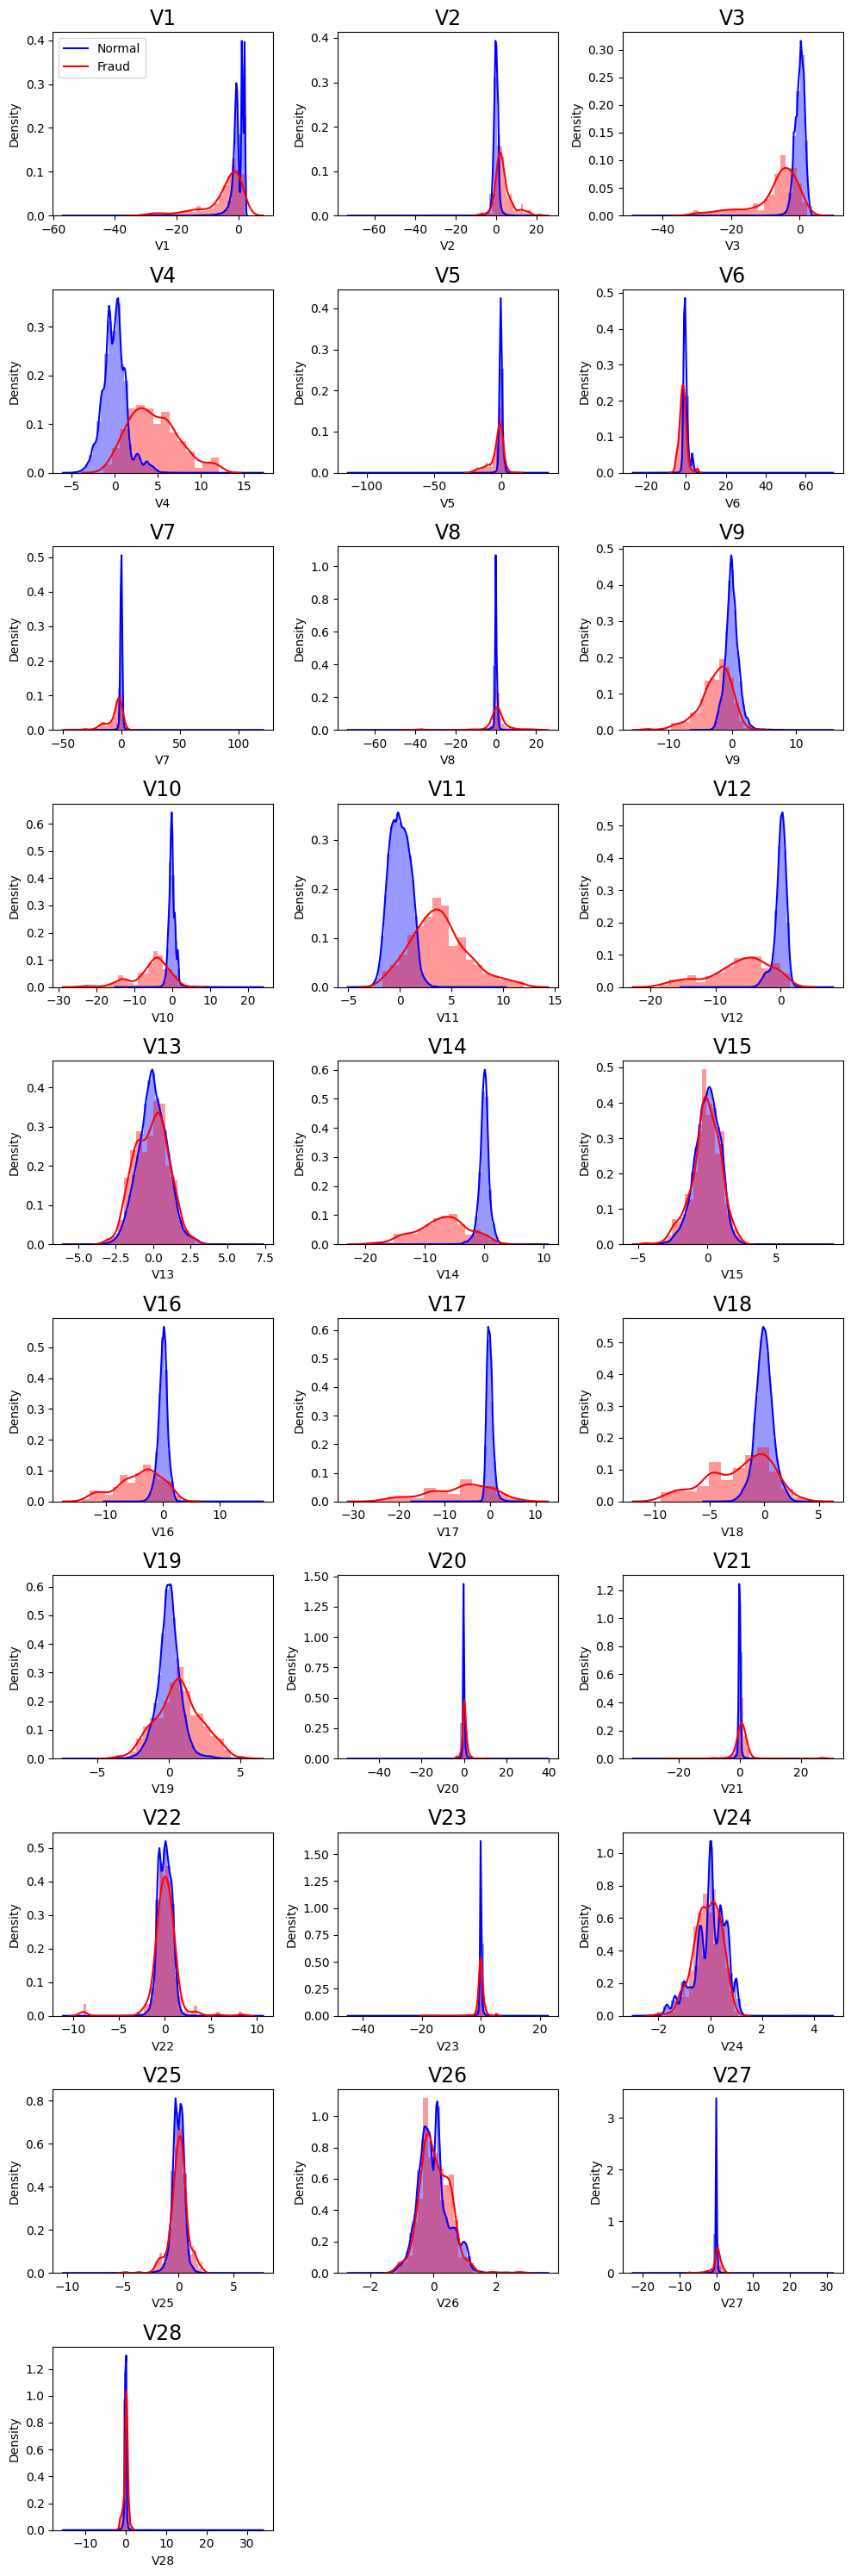

In [ ]:
# Remove the columns 'Time', 'Amount', and 'Class' from the list of columns.
cols_to_exclude = ['Time', 'Amount', 'Class']
cols = [col for col in credit_df_raw.columns if col not in cols_to_exclude]

normal_records = credit_df_raw['Class'] == 0
fraud_records = credit_df_raw['Class'] == 1

num_cols = len(cols)  # Get the number of columns

# Calculate the number of rows and columns for subplots
num_rows = (num_cols // 3) + (num_cols % 3 > 0)  # Round up the division
plt.figure(figsize=(10, 3 * num_rows))  # Adjust the figure size based on the number of rows

for n, col in enumerate(cols, start=1):  # Start enumerate from 1
    plt.subplot(num_rows, 3, n)
    sns.distplot(credit_df_raw[col][normal_records], color='blue')  # Plot normal data
    sns.distplot(credit_df_raw[col][fraud_records], color='red')  # Plot fraud data
    plt.title(col, fontsize=17)
    if n == 1:  # Add legend only for the first subplot
        plt.legend(labels=['Normal', 'Fraud'])

plt.tight_layout()  # Adjust subplot parameters to give specified padding

# # Save the plot as an image file (e.g., PNG)
# plt.savefig('distplot.png', bbox_inches='tight')

plt.show()

# Chapter 2: Data Wrangling

In [34]:
# Creating a copy of credit_df_raw and naming it credit_df
credit_df = credit_df_raw.copy()

### 2.1: Standard Scaler

In [35]:
from sklearn.preprocessing import StandardScaler

# Aplicar transformação logarítmica na coluna 'Amount'
credit_df['Amount'] = np.log1p(credit_df['Amount'])  # log1p para lidar com valores zero

# Normalizar as colunas 'Time' e 'Amount'
scaler = StandardScaler()
credit_df[['Time', 'Amount']] = scaler.fit_transform(credit_df[['Time', 'Amount']])

In [36]:
credit_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.124303,0
1,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-1.114639,0
2,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.682368,0
3,-1.996562,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.009339,0
4,-1.996541,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670241,0


### 2.2: Splitting Data

In [ ]:
from sklearn.model_selection import train_test_split

# Extracting features (X) and target (y) from the DataFrame
X = credit_df.drop(columns=['Class'])
y = credit_df['Class']

# Splitting the data into training and test sets with stratification
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)  # Splitting again to obtain the validation set

# Displaying the shapes of the resulting datasets
print("Shape of training set:", X_train.shape, y_train.shape)
print("Shape of validation set:", X_val.shape, y_val.shape)
print("Shape of test set:", X_test.shape, y_test.shape)

Shape of training set: (170883, 30) (170883,)
Shape of validation set: (56962, 30) (56962,)
Shape of test set: (56962, 30) (56962,)


In [38]:
# Counting the occurrences of each class in the training, validation, and test set
pd.Series(y_test).value_counts()

Class
0    56864
1       98
Name: count, dtype: int64

In [39]:
# Counting the occurrences of each class in the training, validation, and test set
pd.Series(y_val).value_counts()

Class
0    56870
1       92
Name: count, dtype: int64

In [40]:
# Counting the occurrences of each class in the training, validation, and test set
pd.Series(y_train).value_counts()

Class
0    170581
1       302
Name: count, dtype: int64

### 2.3: Undersampling

In [41]:
from imblearn.under_sampling import RandomUnderSampler

# Create the sampler for undersampling
undersampler = RandomUnderSampler(random_state=42)
# Apply undersampling only to the training set
X_train_us, y_train_us = undersampler.fit_resample(X_train, y_train)

print("Shape of training set after undersampling:", X_train_us.shape, y_train_us.shape)

Shape of training set after undersampling: (604, 30) (604,)


In [42]:
# Counting the occurrences of each class in the training, validation, and test set
pd.Series(y_train_us).value_counts()

Class
0    302
1    302
Name: count, dtype: int64

### 2.4: SMOTE

In [43]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE only on the training set to address class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Shape of training set after undersampling:", X_train_us.shape, y_train_us.shape)

Shape of training set after undersampling: (604, 30) (604,)


In [44]:
# Counting the occurrences of each class in the training, validation, and test set
pd.Series(y_train_resampled).value_counts()

Class
0    170581
1    170581
Name: count, dtype: int64

# Chapter 3: Building Machine Learning Models

### 3.1: Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Instantiate logistic regression model
logistic_model = LogisticRegression(random_state=42)

In [46]:
# Train the logistic regression model using the imbalanced training data
logistic_model.fit(X_train, y_train)

# Generate classification report for the original imbalanced validation set
print(classification_report(y_val, logistic_model.predict(X_val), target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     56870
       Fraud       0.83      0.53      0.65        92

    accuracy                           1.00     56962
   macro avg       0.91      0.77      0.82     56962
weighted avg       1.00      1.00      1.00     56962



In [47]:
# Train the logistic regression model using the imbalanced training data
logistic_model.fit(X_train_us, y_train_us)

# Generate classification report for the original imbalanced validation set
print(classification_report(y_val, logistic_model.predict(X_val), target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       1.00      0.96      0.98     56870
       Fraud       0.03      0.88      0.06        92

    accuracy                           0.96     56962
   macro avg       0.52      0.92      0.52     56962
weighted avg       1.00      0.96      0.98     56962



In [48]:
# Train the logistic regression model using the imbalanced training data
logistic_model.fit(X_train_resampled, y_train_resampled)

# Generate classification report for the original imbalanced validation set
print(classification_report(y_val, logistic_model.predict(X_val), target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       1.00      0.98      0.99     56870
       Fraud       0.06      0.85      0.11        92

    accuracy                           0.98     56962
   macro avg       0.53      0.91      0.55     56962
weighted avg       1.00      0.98      0.99     56962



### 3.2: Random Forest

In [49]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate Random Forest classifier
rf = RandomForestClassifier(class_weight='balanced', random_state=42)

In [50]:
# Train the Random Forest classifier using the imbalanced training data
rf.fit(X_train, y_train)

# Generate classification report for the original imbalanced validation set
print(classification_report(y_val, rf.predict(X_val), target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     56870
       Fraud       0.93      0.68      0.79        92

    accuracy                           1.00     56962
   macro avg       0.96      0.84      0.89     56962
weighted avg       1.00      1.00      1.00     56962



In [51]:
# Train the Random Forest classifier using the imbalanced training data
rf.fit(X_train_us, y_train_us)

# Generate classification report for the original imbalanced validation set
print(classification_report(y_val, rf.predict(X_val), target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       1.00      0.97      0.98     56870
       Fraud       0.04      0.87      0.09        92

    accuracy                           0.97     56962
   macro avg       0.52      0.92      0.53     56962
weighted avg       1.00      0.97      0.98     56962



In [52]:
# Train the Random Forest classifier using the imbalanced training data
rf.fit(X_train_resampled, y_train_resampled)

# Generate classification report for the original imbalanced validation set
print(classification_report(y_val, rf.predict(X_val), target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     56870
       Fraud       0.82      0.75      0.78        92

    accuracy                           1.00     56962
   macro avg       0.91      0.87      0.89     56962
weighted avg       1.00      1.00      1.00     56962



### 3.3: Gradient Boosting

In [53]:
from sklearn.ensemble import GradientBoostingClassifier

# Instantiate Gradient Boosting classifier with specified hyperparameters
gbc = GradientBoostingClassifier(random_state=42)

In [54]:
# Train the Gradient Boosting classifier using the imbalanced training data
gbc.fit(X_train, y_train)

# Generate classification report for the original imbalanced validation set
print(classification_report(y_val, gbc.predict(X_val), target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     56870
       Fraud       0.73      0.52      0.61        92

    accuracy                           1.00     56962
   macro avg       0.86      0.76      0.80     56962
weighted avg       1.00      1.00      1.00     56962



In [55]:
# Train the Gradient Boosting classifier using the balanced training data
gbc.fit(X_train_us, y_train_us)

# Generate classification report for the original imbalanced validation set
print(classification_report(y_val, gbc.predict(X_val), target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       1.00      0.96      0.98     56870
       Fraud       0.03      0.88      0.07        92

    accuracy                           0.96     56962
   macro avg       0.52      0.92      0.52     56962
weighted avg       1.00      0.96      0.98     56962



In [56]:
# Train the Gradient Boosting classifier using the resampled training data
gbc.fit(X_train_resampled, y_train_resampled)

# Generate classification report for the original imbalanced validation set
print(classification_report(y_val, gbc.predict(X_val), target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       1.00      0.99      1.00     56870
       Fraud       0.13      0.83      0.23        92

    accuracy                           0.99     56962
   macro avg       0.57      0.91      0.61     56962
weighted avg       1.00      0.99      0.99     56962



### 3.4: SVC

In [57]:
from sklearn.svm import LinearSVC

# Instantiate Support Vector Classifier 
svc = LinearSVC(random_state=42)

In [58]:
# Train the Support Vector Classifier using the imbalanced training data
svc.fit(X_train, y_train)

# Generate classification report for the original imbalanced validation set
print(classification_report(y_val, svc.predict(X_val), target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     56870
       Fraud       0.88      0.53      0.66        92

    accuracy                           1.00     56962
   macro avg       0.94      0.77      0.83     56962
weighted avg       1.00      1.00      1.00     56962



### 3.5: Neural Network

In [59]:
from sklearn.metrics import classification_report, roc_auc_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Função para criar e treinar o modelo
def create_and_train_model(X_train, y_train, X_test, y_test): 
    model = Sequential()
    model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(16, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

    model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

    y_pred = model.predict(X_test)
    y_pred_classes = (y_pred > 0.5).astype(int)

    print(classification_report(y_test, y_pred_classes))
    print("AUC-ROC:", roc_auc_score(y_test, y_pred))

In [60]:
# 1. Treinar com dados originais
print("Treinamento com dados originais:")
create_and_train_model(X_train, y_train, X_val, y_val) 

# 2. Treinar com undersampling
print("\nTreinamento com undersampling:")
create_and_train_model(X_train_us, y_train_us, X_val, y_val)

# 3. Treinar com SMOTE
print("\nTreinamento com SMOTE:")
create_and_train_model(X_train_resampled, y_train_resampled, X_val, y_val)

Treinamento com dados originais:
Epoch 1/20
4273/4273 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9727 - loss: 0.0921 - val_accuracy: 0.9991 - val_loss: 0.0050
Epoch 2/20
4273/4273 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9988 - loss: 0.0067 - val_accuracy: 0.9995 - val_loss: 0.0047
Epoch 3/20
4273/4273 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9990 - loss: 0.0061 - val_accuracy: 0.9995 - val_loss: 0.0041
Epoch 4/20
4273/4273 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9990 - loss: 0.0053 - val_accuracy: 0.9993 - val_loss: 0.0042
Epoch 5/20
4273/4273 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9991 - loss: 0.0044 - val_accuracy: 0.9993 - val_loss: 0.0042
Epoch 6/20
4273/4273 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9990 - loss: 0.0044 - val_accuracy: 0.9995 - val_loss: 0.0044
Epoch 7/20
4273/4273 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9992 - loss: 0.0039 - val_accuracy: 0.9995 - val_loss: 0.0040
Epoch 8/20
4273/4273 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - 

# Chapter 4: Testing Models and Conclusion

In this stage, we will test the most promising algorithms identified in the previous stage.

### 4.1: Testing Models

In [61]:
# Instantiate Random Forest classifier
rf = RandomForestClassifier(class_weight='balanced', random_state=42)

In [62]:
# Train the Random Forest classifier using the imbalanced training data
rf.fit(X_train, y_train)

# Generate classification report for the original imbalanced validation set
print(classification_report(y_test, rf.predict(X_test), target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     56864
       Fraud       0.96      0.76      0.85        98

    accuracy                           1.00     56962
   macro avg       0.98      0.88      0.92     56962
weighted avg       1.00      1.00      1.00     56962



With this Random Forest algorithm trained on the imbalanced standard dataset, we achieved a good recall of 76% for the fraud class and an excellent precision rate of 96%. Notably, the F1-Score reached 85%, the best result in this metric among all the algorithms tested.

In [63]:
# Train the Random Forest classifier using the imbalanced training data
rf.fit(X_train_resampled, y_train_resampled)

# Generate classification report for the original imbalanced validation set
print(classification_report(y_test, rf.predict(X_test), target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     56864
       Fraud       0.85      0.83      0.84        98

    accuracy                           1.00     56962
   macro avg       0.93      0.91      0.92     56962
weighted avg       1.00      1.00      1.00     56962



When we applied the SMOTE technique to create balanced resampled training datasets and used these datasets to train the Random Forest algorithm, we achieved the most balanced algorithm among all those tested. In this case, we obtained a recall rate of 83%, indicating that the algorithm is effectively detecting numerous fraud cases, with a very good precision of 85%. The F1-Score was also impressive, at 84%.

In [64]:
# Treinar com SMOTE
print("\nTreinamento com SMOTE:")
create_and_train_model(X_train_resampled, y_train_resampled, X_test, y_test)


Treinamento com SMOTE:
Epoch 1/20
8530/8530 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.9212 - loss: 0.1894 - val_accuracy: 0.9979 - val_loss: 0.0241
Epoch 2/20
8530/8530 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.9898 - loss: 0.0317 - val_accuracy: 0.9984 - val_loss: 0.0151
Epoch 3/20
8530/8530 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.9921 - loss: 0.0246 - val_accuracy: 1.0000 - val_loss: 0.0105
Epoch 4/20
8530/8530 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.9928 - loss: 0.0222 - val_accuracy: 0.9996 - val_loss: 0.0087
Epoch 5/20
8530/8530 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.9926 - loss: 0.0224 - val_accuracy: 1.0000 - val_loss: 0.0087
Epoch 6/20
8530/8530 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.9936 - loss: 0.0206 - val_accuracy: 1.0000 - val_loss: 0.0089
Epoch 7/20
8530/8530 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.9936 - loss: 0.0202 - val_accuracy: 0.9999 - val_loss: 0.0069
Epoch 8/20
8530/8530 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - ac

With the Sequential Neural Network we developed, we achieved a very good recall of 86% for the fraud class. Unfortunately, the precision was not as strong, reaching only 56% for our minority class. With an F1-Score of 68%, this algorithm demonstrated a good ability to detect fraud; however, due to the low precision, it is likely to generate numerous false alerts.

### 4.2: Random Search

Finally, I will share the random search I conducted in pursuit of better hyperparameters. Unfortunately, I did not find any that improved the algorithms overall. When I found one that improved recall, it worsened precision, and vice versa. Therefore, I decided to exclude these hyperparameters from the project.

In [ ]:
# from sklearn.model_selection import RandomizedSearchCV

# # Defina o espaço de hiperparâmetros para a busca
# param_distributions = {
#     'n_estimators': [int(x) for x in np.linspace(start=100, stop=1000, num=10)],
#     'max_features': ['auto', 'sqrt', 'log2'],
#     'max_depth': [int(x) for x in np.linspace(10, 110, num=11)] + [None],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'bootstrap': [True, False]
# }

# # Instancie o classificador Random Forest
# rf = RandomForestClassifier(class_weight='balanced', random_state=42)

# # Configure a RandomizedSearchCV
# random_search = RandomizedSearchCV(
#     estimator=rf,
#     param_distributions=param_distributions,
#     n_iter=40,  # Número de combinações a serem testadas
#     cv=3,  # Número de folds para validação cruzada
#     verbose=2,
#     random_state=42,
#     n_jobs=-1,  # Use todos os núcleos disponíveis
#     scoring='f1'
# )

# # Treine a RandomizedSearchCV
# random_search.fit(X_train, y_train)

# # Imprima os melhores parâmetros encontrados
# print("Melhores parâmetros encontrados:", random_search.best_params_)

# # Avalie o modelo com os melhores parâmetros no conjunto de validação
# best_rf = random_search.best_estimator_
# y_pred = best_rf.predict(X_val)
# print(classification_report(y_val, y_pred, target_names=['Not Fraud', 'Fraud']))

In [ ]:
# # Treine a RandomizedSearchCV
# random_search.fit(X_train, y_train)

# # Imprima os melhores parâmetros encontrados
# print("Melhores parâmetros encontrados:", random_search.best_params_)

# # Avalie o modelo com os melhores parâmetros no conjunto de teste
# best_rf = random_search.best_estimator_
# y_pred = best_rf.predict(X_val)
# print(classification_report(y_val, y_pred, target_names=['Not Fraud', 'Fraud']))

In [ ]:
# # Treine a RandomizedSearchCV
# random_search.fit(X_train_resampled, y_train_resampled)

# # Imprima os melhores parâmetros encontrados
# print("Melhores parâmetros encontrados:", random_search.best_params_)

# # Avalie o modelo com os melhores parâmetros no conjunto de teste
# best_rf = random_search.best_estimator_
# y_pred = best_rf.predict(X_val)
# print(classification_report(y_val, y_pred, target_names=['Not Fraud', 'Fraud']))